In [0]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np

Using TensorFlow backend.


In [0]:
encoding_dim = 32  
input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,epochs=5,batch_size=256,shuffle=True,validation_data=(x_test, x_test))

In [0]:
encoding_dim = 32
hidden_size = 128
input_img = Input(shape=(784,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(hidden_2)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencode=autoencoder.fit(x_train, x_train,epochs=5, batch_size=256, verbose=2, shuffle=True, validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 4s - loss: 0.5070 - accuracy: 0.4513 - val_loss: 0.4118 - val_accuracy: 0.4886
Epoch 2/5
 - 4s - loss: 0.3857 - accuracy: 0.4919 - val_loss: 0.3749 - val_accuracy: 0.4885
Epoch 3/5
 - 4s - loss: 0.3641 - accuracy: 0.4956 - val_loss: 0.3536 - val_accuracy: 0.4959
Epoch 4/5
 - 4s - loss: 0.3478 - accuracy: 0.4988 - val_loss: 0.3423 - val_accuracy: 0.4962
Epoch 5/5
 - 4s - loss: 0.3363 - accuracy: 0.5011 - val_loss: 0.3326 - val_accuracy: 0.5018


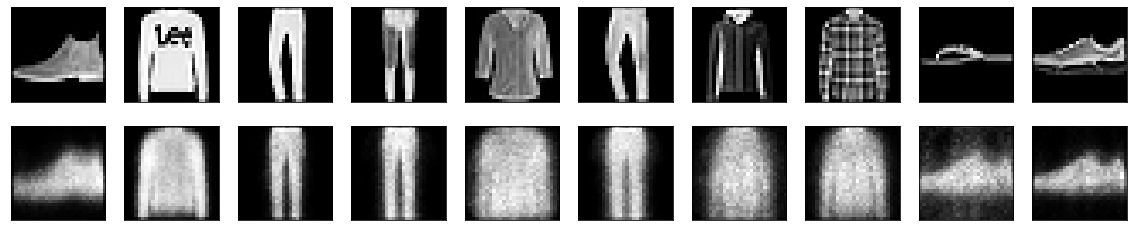

In [29]:
import matplotlib.pyplot as plt
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32  

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,epochs=10,batch_size=256,shuffle=True,validation_data=(x_test_noisy, x_test_noisy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.5359 - val_loss: 0.4655
Epoch 2/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.4319 - val_loss: 0.4064
Epoch 3/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.4009 - val_loss: 0.3881
Epoch 4/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.3856 - val_loss: 0.3721
Epoch 5/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.3716 - val_loss: 0.3577
Epoch 6/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.3602 - val_loss: 0.3463
Epoch 7/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.3515 - val_loss: 0.3376
Epoch 8/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.3449 - val_loss: 0.3306
Epoch 9/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.3396 - val_loss: 0.3249
Epoch

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 3s - loss: 0.5349 - accuracy: 0.4435 - val_loss: 0.4650 - val_accuracy: 1.2755e-07
Epoch 2/5
 - 2s - loss: 0.4301 - accuracy: 0.4874 - val_loss: 0.4087 - val_accuracy: 1.2755e-07
Epoch 3/5
 - 2s - loss: 0.3997 - accuracy: 0.4907 - val_loss: 0.3921 - val_accuracy: 1.2755e-07
Epoch 4/5
 - 2s - loss: 0.3847 - accuracy: 0.4934 - val_loss: 0.3776 - val_accuracy: 1.2755e-07
Epoch 5/5
 - 2s - loss: 0.3714 - accuracy: 0.4957 - val_loss: 0.3652 - val_accuracy: 1.2755e-07


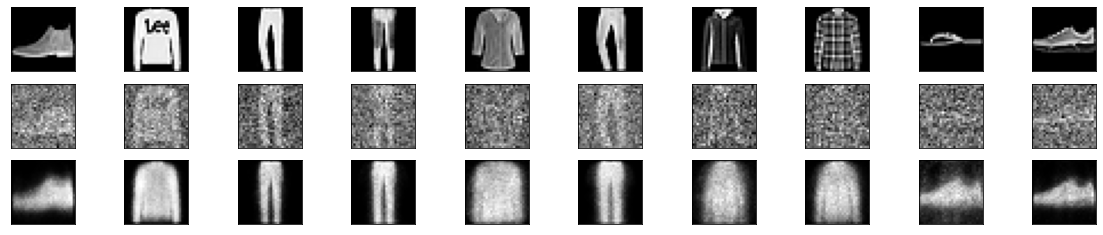

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32  

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,epochs=5,batch_size=256,shuffle=True,verbose=2,
                validation_data=(x_test, x_test_noisy))

encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display noisy
    ax = plt.subplot(3, n, i + 1+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i+1+n+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 4s - loss: 0.4985 - accuracy: 0.4566 - val_loss: 0.4035 - val_accuracy: 0.4871
Epoch 2/5
 - 4s - loss: 0.3834 - accuracy: 0.4919 - val_loss: 0.3741 - val_accuracy: 0.4948
Epoch 3/5
 - 4s - loss: 0.3651 - accuracy: 0.4960 - val_loss: 0.3552 - val_accuracy: 0.4951
Epoch 4/5
 - 4s - loss: 0.3471 - accuracy: 0.5000 - val_loss: 0.3431 - val_accuracy: 0.5017
Epoch 5/5
 - 4s - loss: 0.3349 - accuracy: 0.5017 - val_loss: 0.3347 - val_accuracy: 0.4974


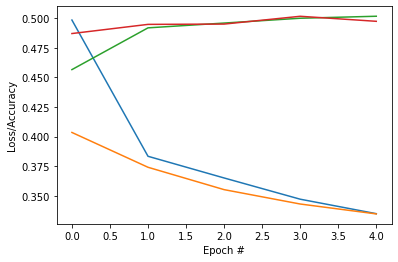

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

import matplotlib.pyplot as plt
encoding_dim = 32  
hidden_size = 128
input_img = Input(shape=(784,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencode=autoencoder.fit(x_train, x_train,epochs=5,batch_size=256,verbose=2,shuffle=True,validation_data=(x_test, x_test))

N=5
plt.figure()
plt.plot(np.arange(0, N), autoencode.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), autoencode.history["val_loss"], label="test_loss")
plt.plot(np.arange(0, N), autoencode.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), autoencode.history["val_accuracy"], label="test_acc")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.show()